The goal of this tutorial is to provide an overview to the STAC specification, a breakdown of each STAC component, and how they are integrated together.

Open this notebook in Colab below:

<a target="_blank" href="https://colab.research.google.com/github/planetlabs/notebooks/blob/master/jupyter-notebooks/cloud-native-geospatial/intro-to-stac/introduction-to-stac-part1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

---

## What is STAC?

The [Spatial Temporal Asset Catalog](https://github.com/radiantearth/stac-api-spec) specification was designed to establish a standard, unified language to talk about geospatial data, allowing it to more easily searchable and queryable.

An overarching goal in having this common standard is to eliminate the need to puruse through APIs of many satellite providers in order to access all the needed data.

STAC is simple and extensible in its design due to how it is structured. STAC is a network of JSON files that reference other JSON files, with each JSON file adhering to a specific core specification depending on what STAC component it is describing. This core JSON format can also be customized to fit differing needs, making the STAC specification highly flexible and adaptable.

---

## STAC Components

The four key components of STAC include items, catalogs, collections, and the STAC API. These components can be used in isolation from one another, but ideally work best in tandem.

### STAC Item

A STAC item is the foundational building block of STAC. It is GeoJSON supplemented with additional metadata that enables clients to traverse through catalogs.

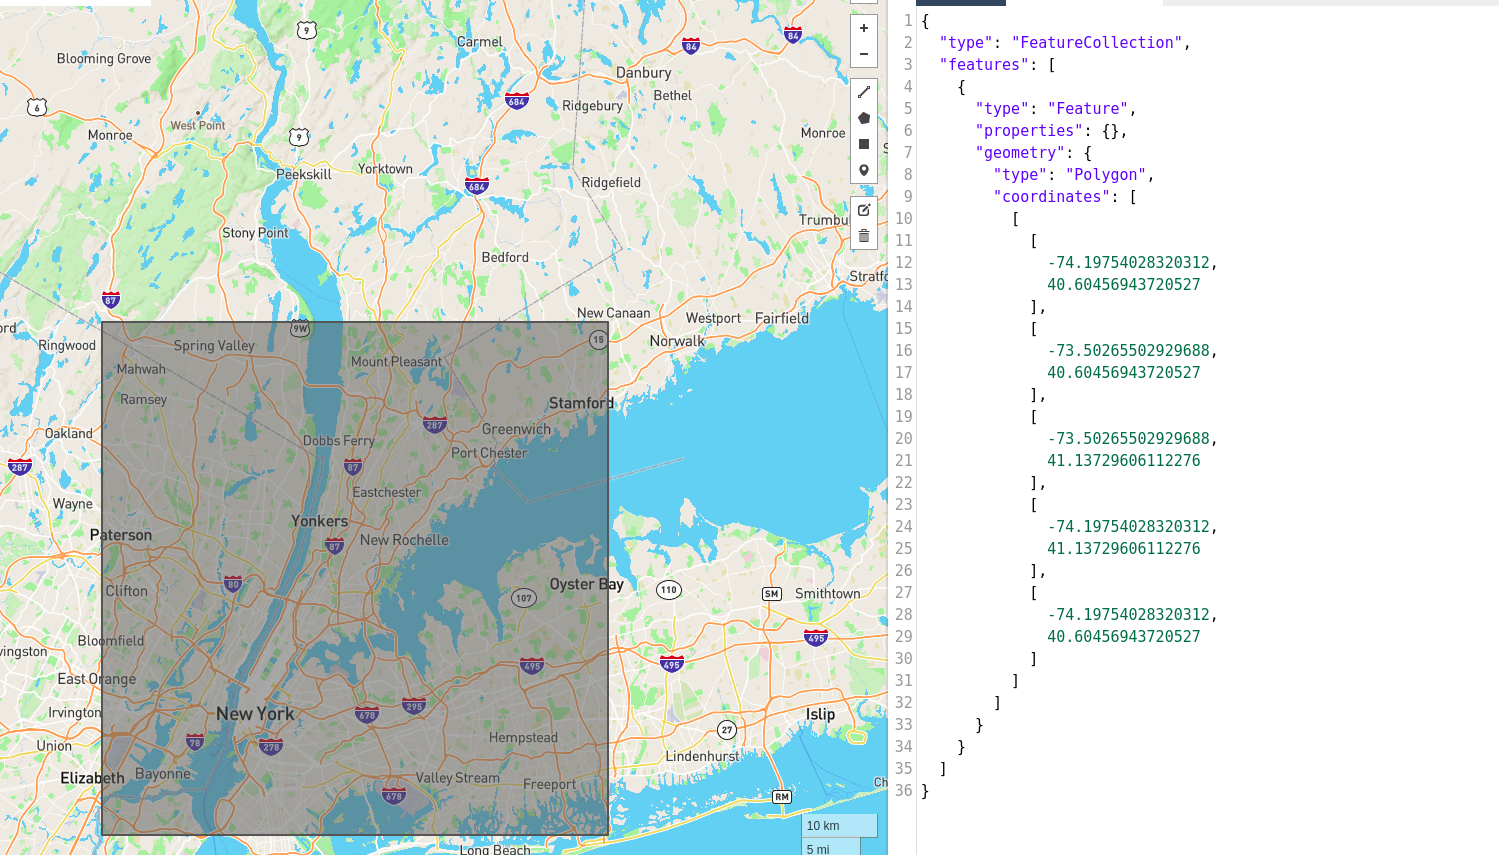

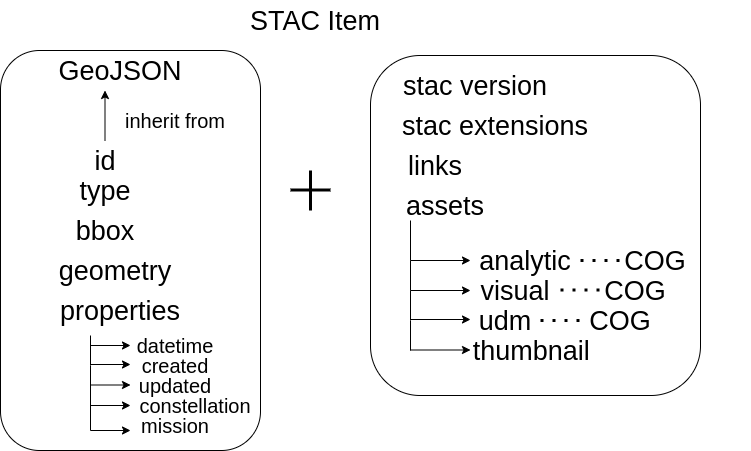

#### Import pystac package

In [1]:
import pystac

In [2]:
print(pystac.Item.__doc__)

An Item is the core granular entity in a STAC, containing the core metadata
    that enables any client to search or crawl online catalogs of spatial 'assets' -
    satellite imagery, derived data, DEM's, etc.

    Args:
        id : Provider identifier. Must be unique within the STAC.
        geometry : Defines the full footprint of the asset represented by this
            item, formatted according to
            `RFC 7946, section 3.1 (GeoJSON) <https://tools.ietf.org/html/rfc7946>`_.
        bbox :  Bounding Box of the asset represented by this item
            using either 2D or 3D geometries. The length of the array must be 2*n
            where n is the number of dimensions. Could also be None in the case of a
            null geometry.
        datetime : datetime associated with this item. If None,
            a start_datetime and end_datetime must be supplied.
        properties : A dictionary of additional metadata for the item.
        start_datetime : Optional start datetim

To learn more about STAC Item specifications: https://github.com/radiantearth/stac-spec/tree/master/item-spec

---

### STAC Catalog

A Catalog is usually the starting point for navigating a STAC. A catalog.json file will contain contains links to some combination of other catalogs, collections, and/or items. This combination is quite variable and flexible depending on how the data is being organized. A catalog may only reference a group of items, it may link toother subcatalogsand no collections, or a combination of catalogs and collections, etc.

We can think of it like a directory tree on a computer.

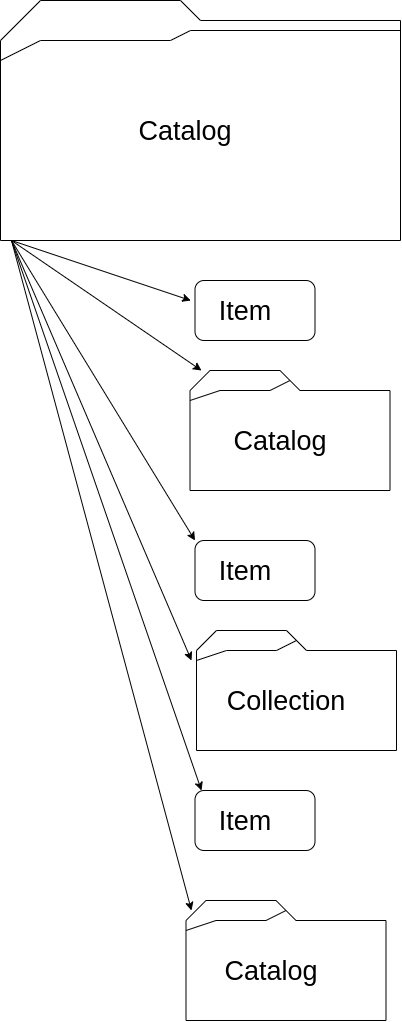

#### STAC Catalog Relation and Media Types

<b>Self</b>: Absolute URL to where the given json file can be found online, if possible

<b>Root</b>: Root: URL to root catalog or collection

<b>Parent</b>: URL to a Parent STAC Specification (could be an item, catalog, collection)

<b>Child</b>: URL to a Child STAC Specification (item, catalog, collection)

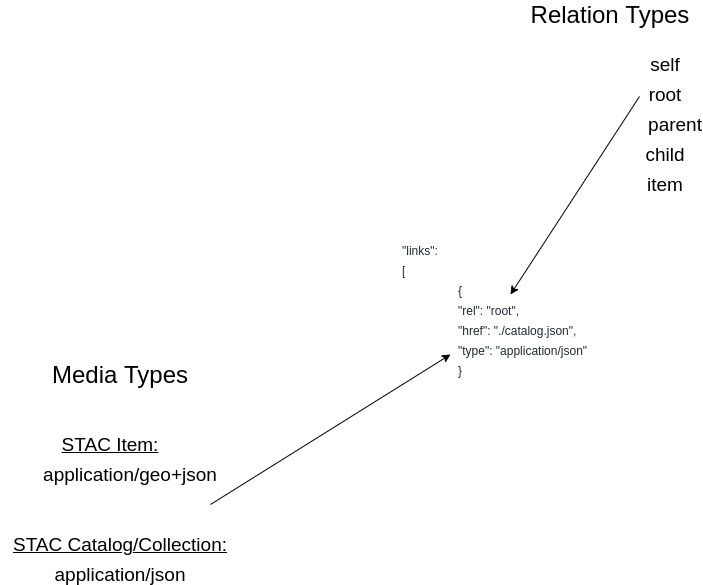

In [3]:
print(pystac.Catalog.__doc__)

A PySTAC Catalog represents a STAC catalog in memory.

    A Catalog is a :class:`~pystac.STACObject` that may contain children,
    which are instances of :class:`~pystac.Catalog` or :class:`~pystac.Collection`,
    as well as :class:`~pystac.Item` s.

    Args:
        id : Identifier for the catalog. Must be unique within the STAC.
        description : Detailed multi-line description to fully explain the catalog.
            `CommonMark 0.29 syntax <https://commonmark.org/>`_ MAY be used for rich
            text representation.
        title : Optional short descriptive one-line title for the catalog.
        stac_extensions : Optional list of extensions the Catalog implements.
        href : Optional HREF for this catalog, which be set as the
            catalog's self link's HREF.
        catalog_type : Optional catalog type for this catalog. Must
            be one of the values in :class:`~pystac.CatalogType`.
    


To learn more about STAC Catalog specifications: https://github.com/radiantearth/stac-spec/tree/master/catalog-spec

---

### STAC Collection

A STAC Collection builds upon the STAC Catalog specification to include additional metadata about a set of items that exist as part of the collection.

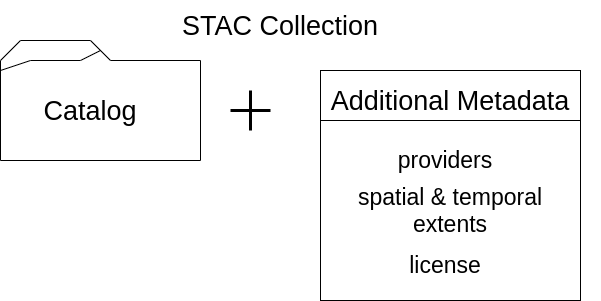

In [4]:
print(pystac.Collection.__doc__)

A Collection extends the Catalog spec with additional metadata that helps
    enable discovery.

    Args:
        id : Identifier for the collection. Must be unique within the STAC.
        description : Detailed multi-line description to fully explain the
            collection. `CommonMark 0.29 syntax <https://commonmark.org/>`_ MAY
            be used for rich text representation.
        extent : Spatial and temporal extents that describe the bounds of
            all items contained within this Collection.
        title : Optional short descriptive one-line title for the
            collection.
        stac_extensions : Optional list of extensions the Collection
            implements.
        href : Optional HREF for this collection, which be set as the
            collection's self link's HREF.
        catalog_type : Optional catalog type for this catalog. Must
            be one of the values in :class`~pystac.CatalogType`.
        license :  Collection's license(s) as a
     

To learn more about STAC Collection specifications: https://github.com/radiantearth/stac-spec/tree/master/collection-spec

---

### Dynamic versus Static STAC Catalogs

STAC Catalogs can be static, by creating the json files and storing them either in local directories, on file servers, or stored on cloud services like Amazon Simple Storage Service (Amazon S3)or Google Cloud Storage. 

This makes static STAC Catalogs highly portable, reliable, providing a solid foundation for building dynamic versions through the use of APIs. 

### STAC API

This leads  us to STAC APIs, the last component of the STAC specification. A STAC API is a  RESTful API specification for querying STAC catalogs in a dynamic way. It is designed with a standard set of endpoints for searching catalogs, collections, and items. 

You can find details in the API specification here: https://github.com/radiantearth/stac-api-spec

---

### Next Steps

In the next tutorial, we will demonstrate how to generate a simple, static STAC Catalog of some Planet imagery using the Orders API STAC metadata.!